In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [4]:
df= pd.read_csv("economic_index.csv")

df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


# Feature Engineering

In [9]:
#drop unnecessary columns

print(df.columns)

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')


In [11]:
df.drop(columns=['Unnamed: 0', 'year', 'month', ], axis=1, inplace=True)

KeyError: "['Unnamed: 0', 'year', 'month'] not found in axis"

In [13]:
df.head()


,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [18]:
#confirm no null values exist
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

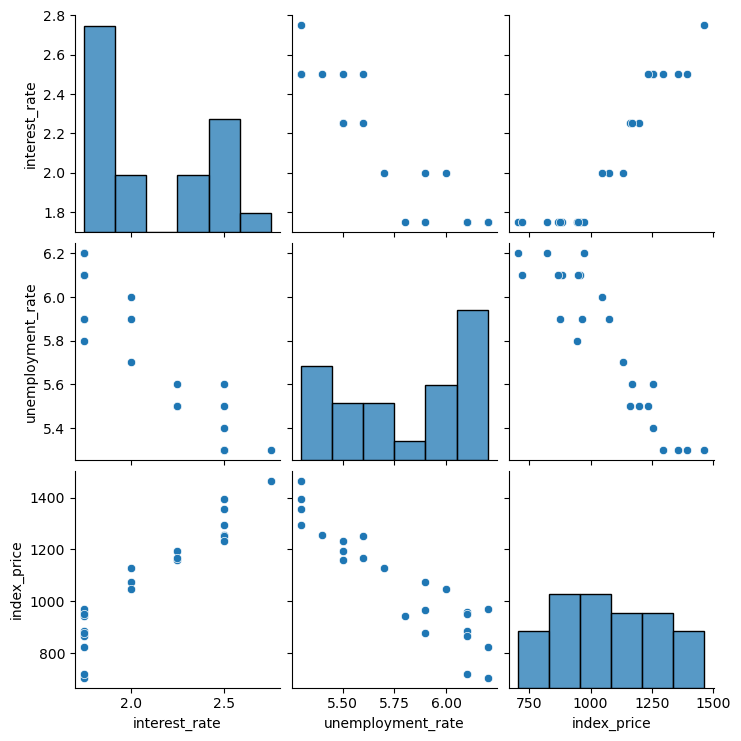

In [20]:
#visualize data

import seaborn as sns

sns.pairplot(df)

In [21]:
#get correlation

df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


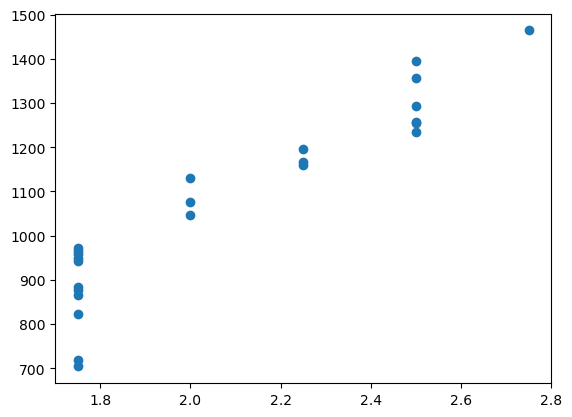

In [23]:
plt.scatter(df["interest_rate"], df["index_price"])

In [25]:
# define x & y from dataset

X=df.iloc[:, :-1]

y=df.iloc[:, -1]

In [26]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [28]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [41]:
#split data in train & test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

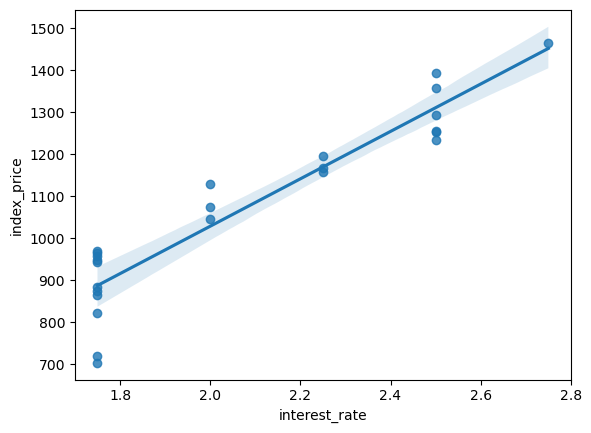

In [34]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

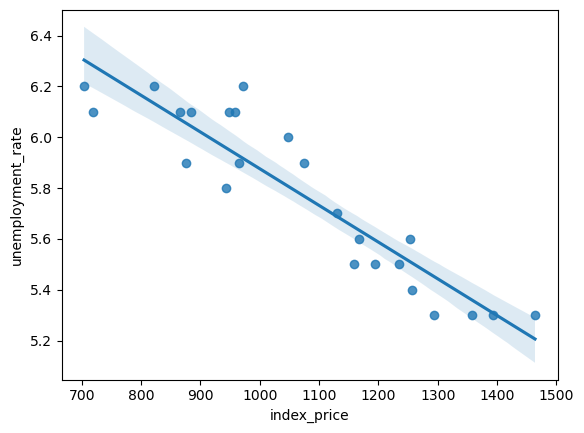

In [35]:


sns.regplot(x=df['index_price'],y=df['unemployment_rate'])

In [37]:
#data trsforming

from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.fit_transform(X_test)

In [45]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

# Model

In [49]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [52]:
#cross validation


from sklearn.model_selection import cross_val_score

validation_score =cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=3)

np.mean(validation_score)

-5914.82818016239

In [56]:
y_pred =regressor.predict(X_test)

y_pred


array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)


rmse =np.sqrt(mse)

score =r2_score(y_test, y_pred)
adjustedscore =1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1])






print(mse, mae, rmse, score, adjustedscore)



8108.567426306613 73.804449323371 90.04758423359625 0.7591371539010254 0.6989214423762817


# Assumption

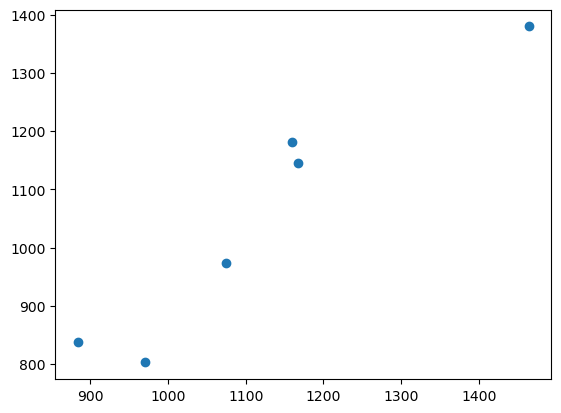

In [61]:
plt.scatter(y_test, y_pred)

In [64]:
residual = y_test-  y_pred

residual

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

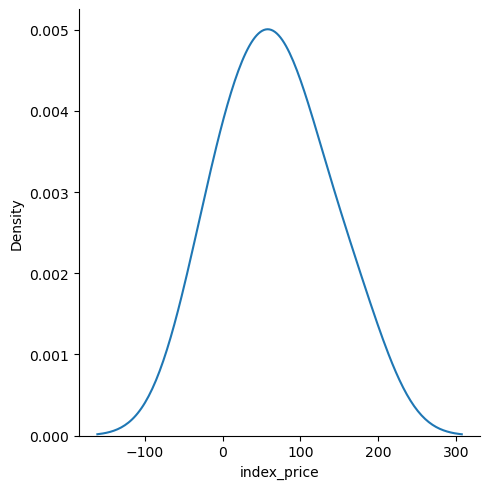

In [66]:
sns.displot(residual, kind="kde")

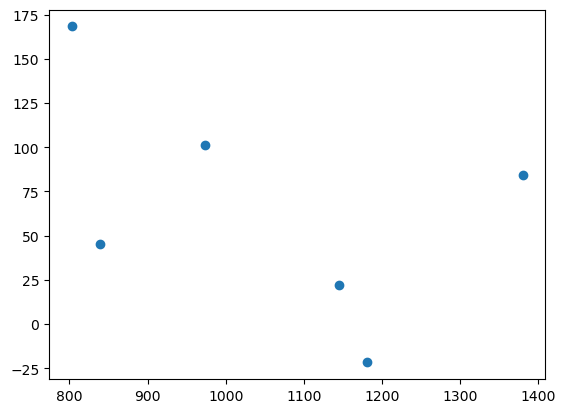

In [68]:
plt.scatter(y_pred, residual)